<img src="./unal.png" align=left width="150" height="150"></img>

$\;$

---
<h2 align="center">MLG Banco (Estudio de creditos buenos)</h2>

### Oscar Julian Layton

Estos datos, analizados por Charpentier (2015, página 166) y disponibles en el objeto credit del paquete CASdatasets de R, corresponden a la información de 1000 créditos bancarios, en que los créditos considerados “buenos” y “malos” se identifican como class = 0 y class = 1, respectivamente. El objetivo del análisis es estimar la probabilidad que un crédito sea
“bueno” a partir de algunas características del crédito como: 

* **duration**: Duración, en meses 
* **purpose**: Objetivo.
* **credit.amount**: Valor, en marcos alemanes.

 Y algunas características como:
 
 
* **credit.history**:  historial crediticio
* **age**: año
* **employment**: tiempo en su empleo actual
* **personal.status**: estado civil y su género
* **job**: tipo de trabajo
* **housing**: tipo de alojamiento



In [38]:
library(CASdatasets)
library(xts)
library(zoo)
library(datasets)
library(ggplot2)
library(cowplot)
data(credit)
head(credit, n=8)

#rm(list=ls())
getwd()
setwd("")  #Asignando capeta busqueda por default
source("macros.txt")           # Llamar el archivo de macros que esta en la carpeta especifica,
                               # macros son una fuciines especificas creadas porel profesor

checking_status,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,telephone,foreign_worker,class
A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,0
A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,0
A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,0


[1] "C:/Users/YULY/Desktop/Desktop/UNAL 2018/MLGz/MLG Vanegas"

La información corresponde a 1.000 créditos bancarios de los cuales 700 están clasificados como
buenos y 300 como malos; El rango de duración de estos créditos varía entre 4 y 72 meses,
con un promedio de 20.9 meses. Estos créditos se encuentran clasificados en 11 categorías
según su propósito, la categoría de mayor uso corresponde a carro nuevo (A40).
Por otra parte, el valor promedio de los créditos fue de 3271 marcos alemanes y el promedio
de los clientes que solicitan créditos es de 33 años.


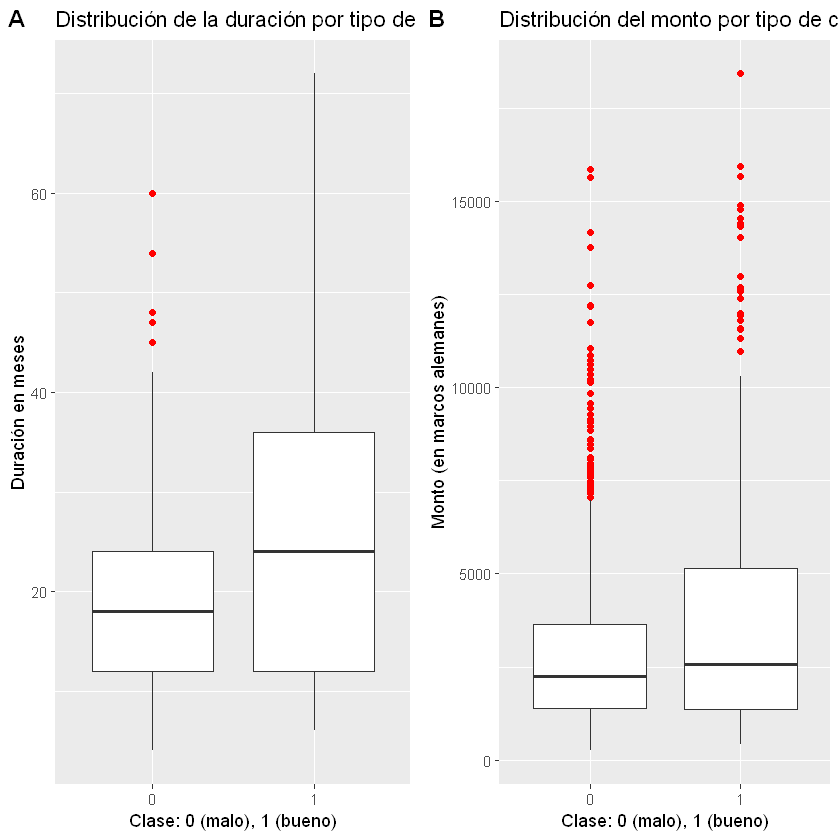

In [6]:
C <-noquote(paste0("A",c(41:49, 410)))
credit <- within(credit,{purpose <- factor(purpose, levels=C)})
p<-ggplot(credit, aes(x = factor(class), y = duration)) + geom_boxplot(outlier.colour = "red") +
labs(title = "Distribución de la duración por tipo de credito", x = "Clase: 0 (malo), 1 (bueno)", y = "Duración en meses")

q<-ggplot(credit, aes(x = factor(class), y = credit_amount)) + geom_boxplot(outlier.colour = "red") +
labs(title = "Distribución del monto por tipo de credito", x = "Clase: 0 (malo), 1 (bueno)", y = "Monto (en marcos alemanes)")


plot_grid(p, q, labels = "AUTO")

In [20]:
require(dplyr)
head( select(credit, checking_status,duration) )

checking_status,duration
A11,6
A12,48
A14,12
A11,42
A11,24
A14,36


In [21]:
base<- credit %>% select(checking_status,duration); head( base )

checking_status,duration
A11,6
A12,48
A14,12
A11,42
A11,24
A14,36


In [24]:
creditos <- credit %>% mutate(p2 = purpose) %>% select(class, duration , purpose , credit_amount , credit_history
            , age , employment , personal_status , job ,housing) 
creditos <- creditos %>% na.omit()
historiales <- creditos %>% select(credit_history) %>% unique()
creditos <- creditos %>% mutate (class = as.factor(class))

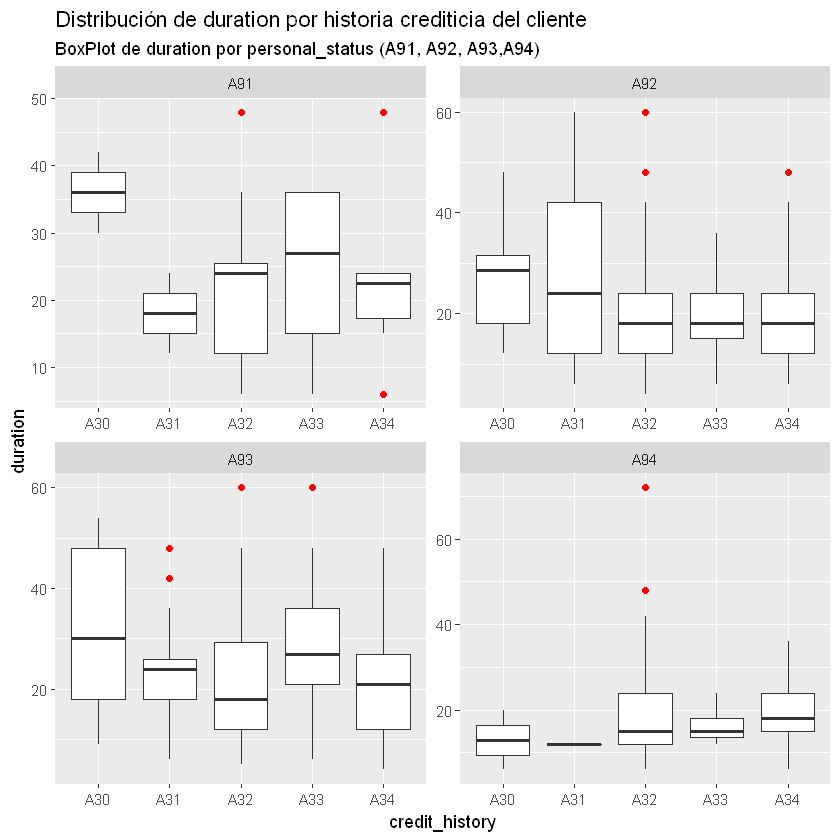

In [25]:
p <- ggplot(data = creditos, aes(x=credit_history, y=duration)) +
    geom_boxplot(outlier.colour = "red") + 
    facet_wrap( ~ personal_status, scales="free") +
    labs(title = "Distribución de duration por historia crediticia del cliente",
    subtitle = "BoxPlot de duration por personal_status (A91, A92, A93,A94)");p


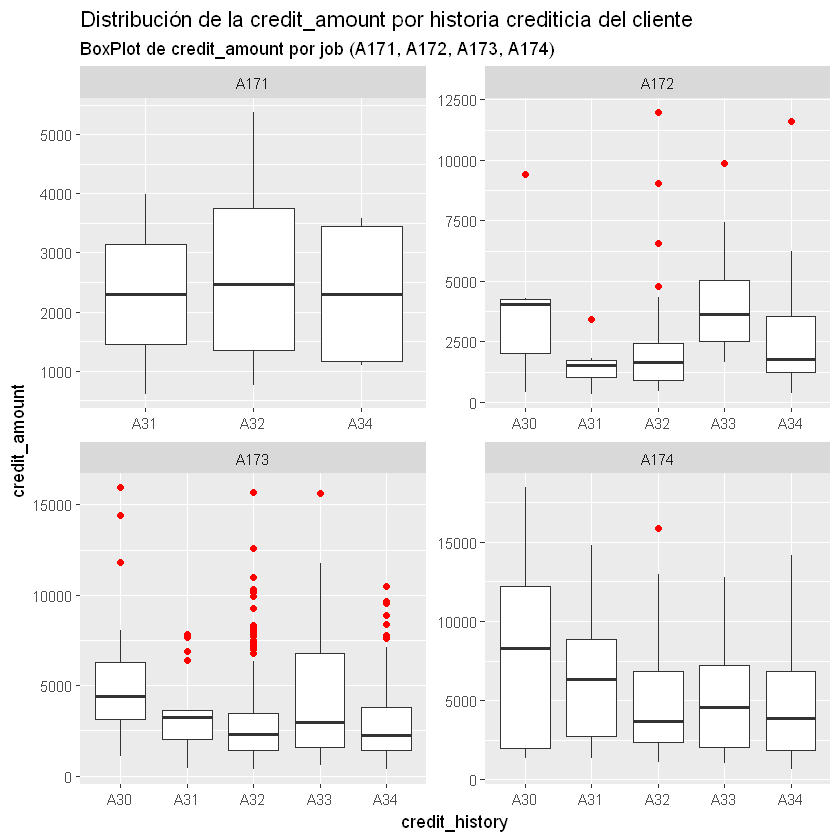

In [27]:
p <- ggplot(data = creditos, aes(x=credit_history, y=credit_amount)) +
geom_boxplot(outlier.colour = "red") + facet_wrap( ~ job, scales="free") + 
labs(title = "Distribución de la credit_amount por historia crediticia del cliente",
subtitle = "BoxPlot de credit_amount por job (A171, A172, A173, A174)");p

Finalmente, podemos decir que hay diferencias entre algunas la duración de los créditos, los montos
y el historial crediticio dependiendo del tipo de clientes (buenos y malos).

# Ajuste de modelos

Ajuste a los datos modelos que asumen que los 1000 valores de la variable respuesta, definida
como 1 para un crédito “bueno” y 0 para un crédito “malo”, son realizaciones de variables
aleatorias independientes con distribución de bernoulli. Considere diferentes funciones de
enlace (logit, probit, complemento log-log y Cauchy) y el siguiente predictor lineal: 

$\eta = 1$ + $duration+purpose$+$credit.amount$+$credit.history$+$age$+$employment$+$personal.status$+$job$+$housin$

Los datos se analizan suponiendo que $y_1, · · · , y_{1000}$ son realizaciones de las variables aleatrias independientes $Y_1, · · · Y_{1000}$ tales que $Y_k \sim Bernoulli(\mu_k)$ donde $g(.)$ es una función de enlace (logit,probit, complemento log-log o Cauchy)

In [34]:
eta <- class ~ 1 + duration + purpose + credit_amount + credit_history+ age + employment + personal_status + job + housing

fit1 <- glm(eta, data = credit, family = binomial)
fit2 <- glm(eta, data = credit, family = binomial(link = "probit"))
fit3 <- glm(eta, data = credit, family = binomial(link = "cloglog"))
fit4 <- glm(eta, data = credit, family = binomial(link = "cauchit"))
#step_glm(fit1, criterion = "BIC", direction = "forward")
#step_glm(fit2, criterion = "BIC", direction = "forward")
#step_glm(fit3, criterion = "BIC", direction = "forward")
#step_glm(fit4, criterion = "BIC", direction = "forward")

eta1 <- class ~ 1 + duration + credit_history
fit1 <- glm(eta1, data = credit, family = binomial)
fit2 <- glm(eta1, data = credit, family = binomial(link = probit))
fit3 <- glm(eta1, data = credit, family = binomial(link = cloglog))
fit4 <- glm(eta1, data = credit, family = binomial(link = cauchit))

#BIC(fit1, fit2, fit3, fit4)
#AIC(fit1, fit2, fit3, fit4)
#gof_glm(fit1)
# R2_D = 0.0743
# R2_P = 0.0054
#gof_glm(fit2)
# R2_D = 0.0749
# R2_P = 0.0037
#gof_glm(fit3)
# R2_D = 0.0708
# R2_P = 0.0101
#gof_glm(fit4)
# R2_D = 0.0706
# R2_P = 0.0141

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


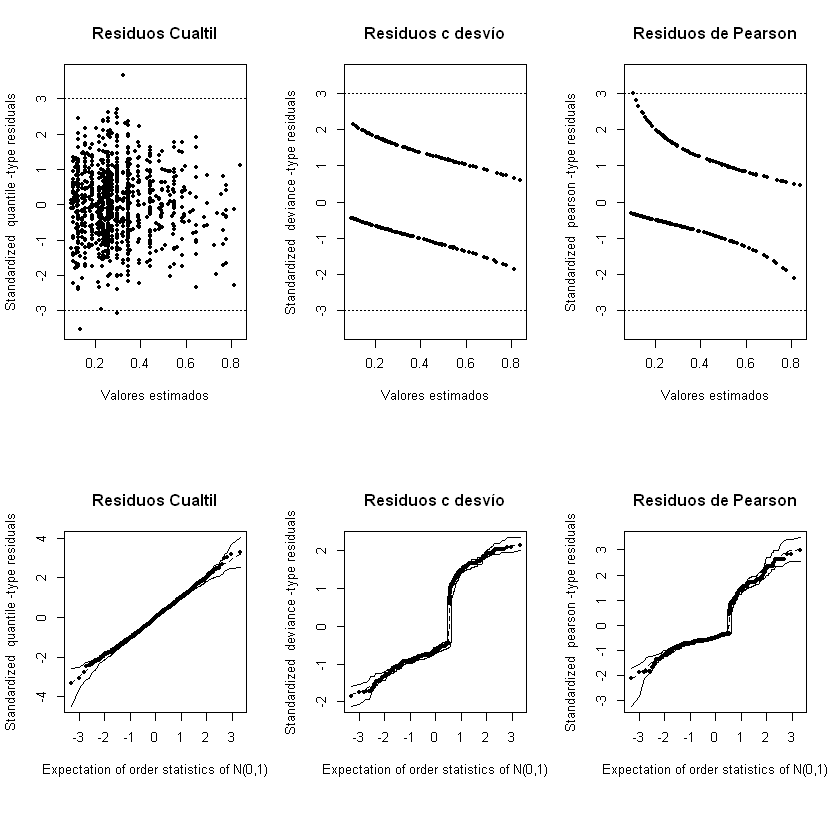

In [39]:
#Análisis Residual
par(mfrow=c(2,3))
residuals_glm(fit2, xlab = "Valores estimados")
title("Residuos Cualtil")
residuals_glm(fit2, xlab = "Valores estimados", type= "deviance")
title("Residuos c desvío")
residuals_glm(fit2, xlab = "Valores estimados", type= "pearson")
title("Residuos de Pearson")
envelope_glm(fit2)
title("Residuos Cualtil")
envelope_glm(fit2, type= "deviance")
title("Residuos c desvío")
envelope_glm(fit2, type= "pearson")
title("Residuos de Pearson")


Haciendo uso de la distancia de cook, tenemos que para el modelo ajustado fit2, los posible valores
influyentes corresponden a los indices 18, 79, 146, 226, 273, 450, 486, 647, 616, 668, 659, 736, 755,
809, 946, 987. Sin embargo al realizar la estimación de los parámetros sin las presencia de los
posibles valores influyentes, en todos los casos el parámetro sigue siendo significativo.


ERROR: Error in case.deletion_glm(fit21, -c(18, 79, 146, 226, 273, 450, 486, : objeto 'fit21' no encontrado


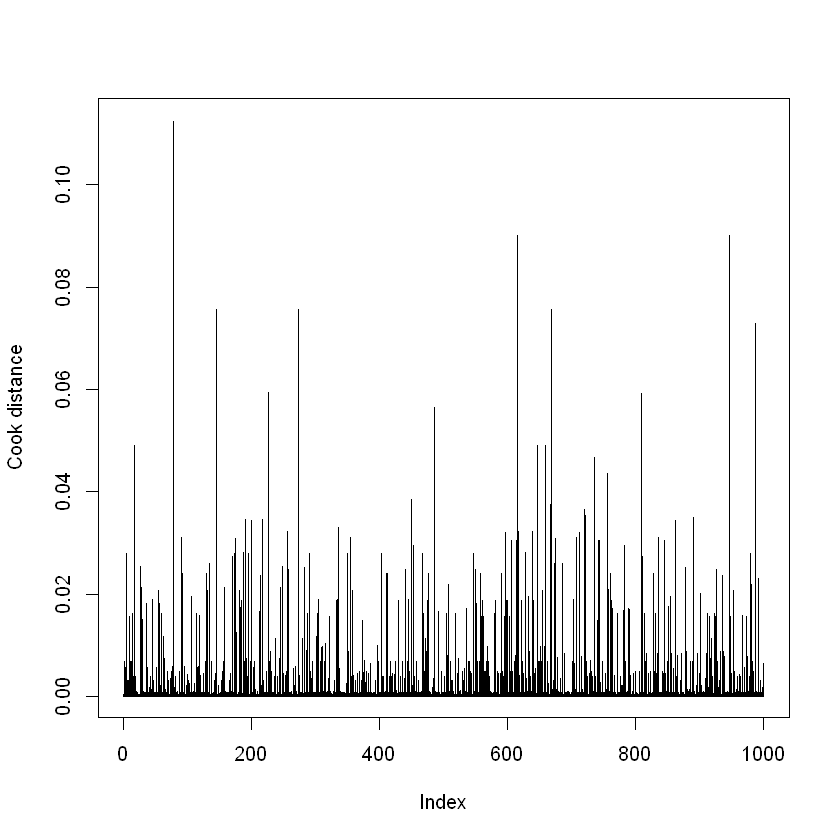

In [40]:
Cookdis_glm(fit2, identify= 16 )
case.deletion_glm(fit21,-c(18,79,146,226,273,450,486,647,616,668,659,736,755,809,946,987))


--- 
# Solución de Vanegas

La variable respuesta es:

$$Y_k: 1-class$$

Esto es debido a que los ceros son los buenos

In [44]:
eta <- 1-class ~ 1 + duration + purpose + credit_amount + credit_history+ age + employment + personal_status + job + housing

fit1 <- glm(eta, data = credit, family = binomial(link="logit"))
fit2 <- glm(eta, data = credit, family = binomial(link = "probit"))
fit3 <- glm(eta, data = credit, family = binomial(link = "cloglog"))
fit4 <- glm(eta, data = credit, family = binomial(link = "cauchit"))

Según el procedimiento forward, se tiene que:

In [46]:
step_glm(fit1, criterion = "BIC", direction = "backward")
#step_glm(fit2, criterion = "BIC", direction = "forward")
#step_glm(fit3, criterion = "BIC", direction = "forward")
#step_glm(fit4, criterion = "BIC", direction = "forward")


  Family:  binomial 
    Link:  logit 

Initial model:
1 - class ~ 1 + duration + purpose + credit_amount + credit_history + age + employment + personal_status + job + housing 

Step 0 :    
                  Df       BIC       AIC   Deviance+  Pearson^  p-value*
- job              3   1222.7525 1095.1509    0.1243   -0.0090    0.6213
- purpose          9   1225.7498 1127.5947    0.0925   -0.0137 3.355e-06
- personal_status  3   1226.5206 1098.9190    0.1211   -0.0087    0.1310
- employment       4   1226.8599 1104.1660    0.1159   -0.0002    0.0148
- housing          2   1235.3492 1102.8398    0.1186   -0.0250    0.0227
- credit_amount    1   1235.6540 1098.2368    0.1232   -0.0155    0.3409
- age              1   1239.2656 1101.8485    0.1202   -0.0153    0.0361
<none>                 1241.6573 1099.3324    0.1231   -0.0162          
- credit_history   4   1256.2681 1133.5742    0.0912   -0.0094 4.229e-08
- duration         1   1259.9130 1122.4959    0.1028   -0.0149 8.121e-07

Step

Se conoce que el mejor predictor (coincide con todos) por medio de BIC está dado por:

$$1 - class \sim 1 + duration + credit\_history $$

In [48]:
eta1 <- 1-class ~ 1 + duration + credit_history
fit1 <- glm(eta1, data = credit, family = binomial(link="logit"))
fit2 <- glm(eta1, data = credit, family = binomial(link = probit))
fit3 <- glm(eta1, data = credit, family = binomial(link = cloglog))
fit4 <- glm(eta1, data = credit, family = binomial(link = cauchit))

In [49]:
AIC(fit1,fit2,fit3,fit4)
#BIC(fit1,fit2,fit3,fit4)

,df,AIC
fit1,6,1137.272
fit2,6,1136.547
fit3,6,1132.972
fit4,6,1141.818


## Modelo final

In [50]:
summary(fit3)


Call:
glm(formula = eta1, family = binomial(link = cloglog), data = credit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2256  -1.1016   0.6572   0.8427   1.7451  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.163221   0.278453  -0.586  0.55776    
duration          -0.022944   0.003766  -6.093 1.11e-09 ***
credit_historyA31  0.052663   0.345778   0.152  0.87895    
credit_historyA32  0.764963   0.269636   2.837  0.00455 ** 
credit_historyA33  0.892380   0.297098   3.004  0.00267 ** 
credit_historyA34  1.207819   0.273886   4.410 1.03e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1221.7  on 999  degrees of freedom
Residual deviance: 1121.0  on 994  degrees of freedom
AIC: 1133

Number of Fisher Scoring iterations: 5


# INTERPRETACIÓN

Se identificará el signo de los parámetros:

* $\widehat{\mu}$: es la probabilidad de que le credito sea bueno. sin embargo _duration=-0.022944_ dio negativo esto quiere decir que a medida que dura más el crédito existe menor probabilidad de que el credito sea considerado como bueno. (la gente se cansa de pagar menos).


* _Historial de crédito_ cuanto mayor sea el historial crediticio, existe mayor probabilidad de que sea un credito considerado como bueno. Esto se debe a que va aumentando de manera monotona los coeficientes.


* El test de wald es no significativa para el nivel crediticio credit_historyA31, esto significa que tener este nivel de credito es lo mismo que tener la categoria base, en terminos de que la probabilidad .....

Loading required package: sqldf
Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite


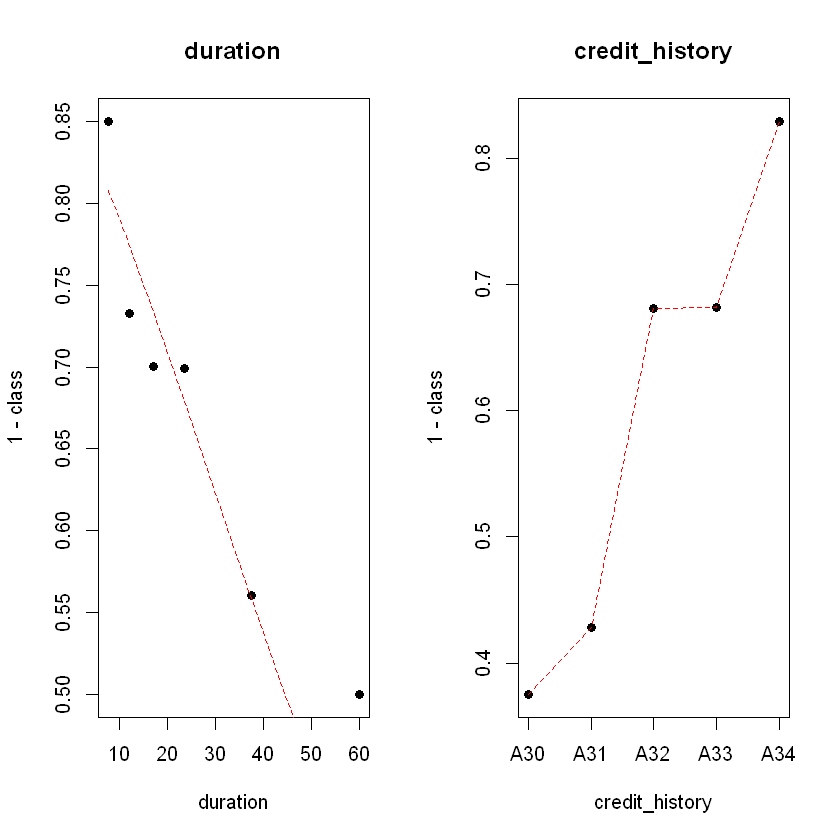

In [52]:
require(sqldf)
graphs_glm(fit3,1,2,pch=16)   #hace graficos marginales, con 1,2 establezco el grafico

En las anteriores gráficas se puede observar que en la variable duración la particiona en dos grupos y para cada punto es la proporción de creditos buenos. en la segunda gráfica se logra observar que a medida que el puntaje de historial crediticio aumenta mayor es la probabilidad de que el creditpo sea bueno.

* $\widehat{\mu}$ es la curva estimada

In [56]:
ci_glm(fit3, conf=0.9, test = "Wald")


 Approximate 90 percent confidence intervals based on the Wald test 

                  Lower limit Upper limit
(Intercept)         -0.621235      0.2948
duration            -0.029138     -0.0167
credit_historyA31   -0.516090      0.6214
credit_historyA32    0.321450      1.2085
credit_historyA33    0.403697      1.3811
credit_historyA34    0.757317      1.6583


en los anteriores intervalos de confianza se ve que en $\beta_3$ se contiene al cero lo cual implica que es no significativa.

---